# Decision Tree Lab

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [2]:
#Debug
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
I_X = iris.data
I_y = iris.target

# Split the dataset into training and testing sets
I_X_train, I_X_test, I_y_train, I_y_test = train_test_split(I_X, I_y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
I_clf = DecisionTreeClassifier()
I_clf.fit(I_X_train, I_y_train)

# Predict on the test set
I_y_pred = I_clf.predict(I_X_test)

# Calculate the accuracy
accuracy = accuracy_score(I_y_test, I_y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [3]:
# Train a Decision Tree classifier with md = 3
I_clf = DecisionTreeClassifier(max_depth=3)
I_clf.fit(I_X_train, I_y_train)

# Predict on the test set
I_y_pred = I_clf.predict(I_X_test)

# Calculate the accuracy
accuracy = accuracy_score(I_y_test, I_y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


So far there is very little difference between these models limiting the max depth. Given few output classes and a few features, it makes sense to me that the accuracy is still really good when you are training and testing on the Iris. I wonder what happens when you do 2 nodes. As I tried it says that it has accuracy of .97 so yeah really easy to classify despite fewer classes.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [4]:
!wget https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff

--2023-10-30 00:14:54--  https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40261 (39K) [text/plain]
Saving to: ‘voting_with_missing.arff’

voting_with_missing 100%[===================>]  39.32K  --.-KB/s    in 0.006s  

2023-10-30 00:14:55 (6.74 MB/s) - ‘voting_with_missing.arff’ saved [40261/40261]



In [71]:
# Learn Voting with missing values.
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the arff file
data, meta = arff.loadarff('voting_with_missing.arff')
v_df = pd.DataFrame(data)


# Convert byte to strings
v_df = v_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Replace '?' with np.nan
v_df.replace('?', np.nan, inplace=True)

# Impute missing values with 'm' for all columns except 'class'
for col in v_df.columns:
    v_df[col].fillna('m', inplace=True)

v_df

# One hot encode the data minus the column names
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(v_df.drop('Class', axis=1))
encoded_columns = encoder.get_feature_names_out(v_df.drop('Class', axis=1).columns)
v_df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)

# Split the data into train and test sets (80/20)
v_X = v_df_encoded
v_y = v_df['Class']
v_X_train, v_X_test, v_y_train, v_y_test = train_test_split(v_X, v_y, test_size=0.2, random_state=42)

# # Train a Decision Tree classifier without stopping criteria
v_clf = DecisionTreeClassifier()
v_clf.fit(v_X_train, v_y_train)

# Predict and compute accuracies
v_y_train_pred = v_clf.predict(v_X_train)
v_y_test_pred = v_clf.predict(v_X_test)

train_accuracy = accuracy_score(v_y_train, v_y_train_pred)
test_accuracy = accuracy_score(v_y_test, v_y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.95


Looking at the data, I saw that all of the columns were basically yes/no values and the missing data was ?. I replaced all of the ? with np.nan values and then interated over the dataset and filled them with the value of M which was to denote missing and could be used in the one hot encoder by sklearn. This was a really simple exercise. There were also no missing values in the final column so I just left that alone. It was able to work well and got a high accuracy probably overfit until purity which cause lower test accuracy.

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [6]:
!wget https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff

--2023-10-30 00:14:55--  https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55386 (54K) [text/plain]
Saving to: ‘cars.arff’

cars.arff           100%[===================>]  54.09K  --.-KB/s    in 0.008s  

2023-10-30 00:14:55 (6.74 MB/s) - ‘cars.arff’ saved [55386/55386]



In [44]:
from sklearn.model_selection import cross_val_score


data, meta = arff.loadarff('cars.arff')
c_df = pd.DataFrame(data)

# Convert byte literals to strings
c_df = c_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# One-hot encode categorical features (excluding the "class" column)
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(c_df.drop('class', axis=1))
encoded_columns = encoder.get_feature_names_out(c_df.drop('class', axis=1).columns)
c_df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)

# Add back the 'class' column
c_df_encoded['class'] = c_df['class'].values

# Split the data into train and test sets (80/20)
c_X = c_df_encoded.drop('class', axis=1)
c_y = c_df['class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier without stopping criteria
c_clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)

accuracies_10fold = cross_val_score(c_clf, c_X, c_y, cv=10)
avg_accuracy_10fold = np.mean(accuracies_10fold)

# Display the 10-fold CV accuracies and their average
print("10-fold Cross Validation Accuracies:")
print(accuracies_10fold)
print(f"Average Accuracy (10-fold CV): {avg_accuracy_10fold:.2f}\n")

# Train a decision tree with 5-fold cross-validation
accuracies_5fold = cross_val_score(c_clf, c_X, c_y, cv=5)
avg_accuracy_5fold = np.mean(accuracies_5fold)

# Display the 5-fold CV accuracies and their average
print("5-fold Cross Validation Accuracies:")
print(accuracies_5fold)
print(f"Average Accuracy (5-fold CV): {avg_accuracy_5fold:.2f}")


10-fold Cross Validation Accuracies:
[0.75722543 0.80924855 0.92485549 0.69364162 0.83815029 0.80346821
 0.9017341  0.85549133 0.91860465 0.84883721]
Average Accuracy (10-fold CV): 0.84

5-fold Cross Validation Accuracies:
[0.78323699 0.73699422 0.70231214 0.8        0.54202899]
Average Accuracy (5-fold CV): 0.71


In [22]:
import pandas as pd

# Convert the 10-fold CV accuracies to a DataFrame
df_10fold = pd.DataFrame({
    'Fold': list(range(1, 11)),
    'Accuracy': accuracies_10fold
})

# Add the average accuracy at the end
df_10fold = df_10fold.append({'Fold': 'Average', 'Accuracy': avg_accuracy_10fold}, ignore_index=True)

# Convert the 5-fold CV accuracies to a DataFrame
df_5fold = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'Accuracy': accuracies_5fold
})

# Add the average accuracy at the end
df_5fold = df_5fold.append({'Fold': 'Average', 'Accuracy': avg_accuracy_5fold}, ignore_index=True)

print("10-fold Cross Validation Results:")
print(df_10fold)

print("\n5-fold Cross Validation Results:")
print(df_5fold)


10-fold Cross Validation Results:
       Fold  Accuracy
0         1  0.745665
1         2  0.809249
2         3  0.919075
3         4  0.705202
4         5  0.843931
5         6  0.803468
6         7  0.907514
7         8  0.855491
8         9  0.924419
9        10  0.848837
10  Average  0.836285

5-fold Cross Validation Results:
      Fold  Accuracy
0        1  0.789017
1        2  0.748555
2        3  0.713873
3        4  0.797101
4        5  0.542029
5  Average  0.718115


<ipython-input-22-776249db3f3c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_10fold = df_10fold.append({'Fold': 'Average', 'Accuracy': avg_accuracy_10fold}, ignore_index=True)
<ipython-input-22-776249db3f3c>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5fold = df_5fold.append({'Fold': 'Average', 'Accuracy': avg_accuracy_5fold}, ignore_index=True)



So I did this with both of the folds and it was interesting to see that the 10 fold was higher by a pretty significant amount. Nearly 12 percent. I think that this makes sense because the 5 fold is taking more of the data out from the training than is the 10 fold but in that case it goes to show what an extra 10% of data does to the accuracy score.

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

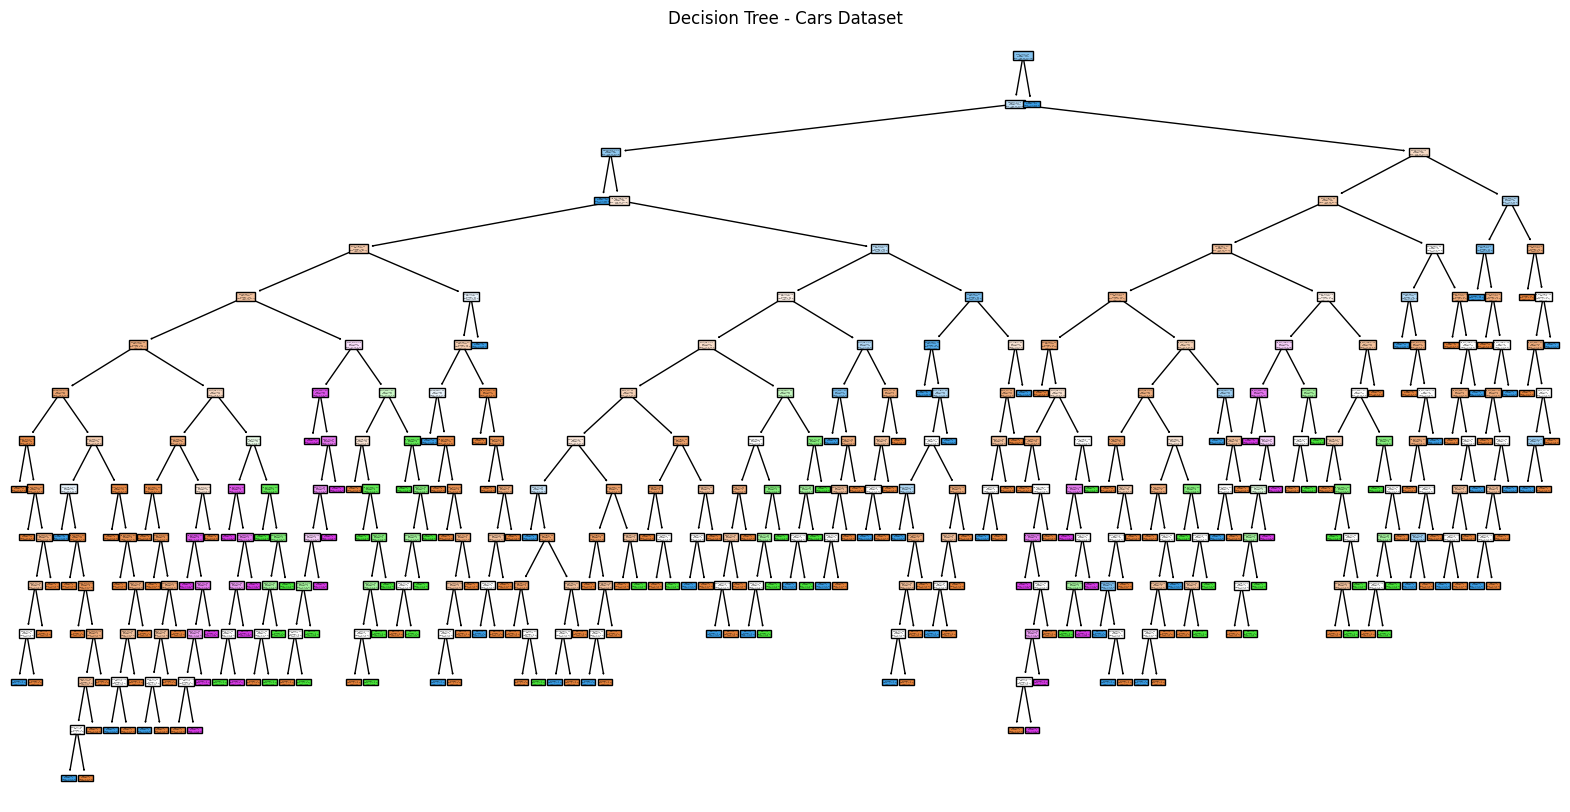

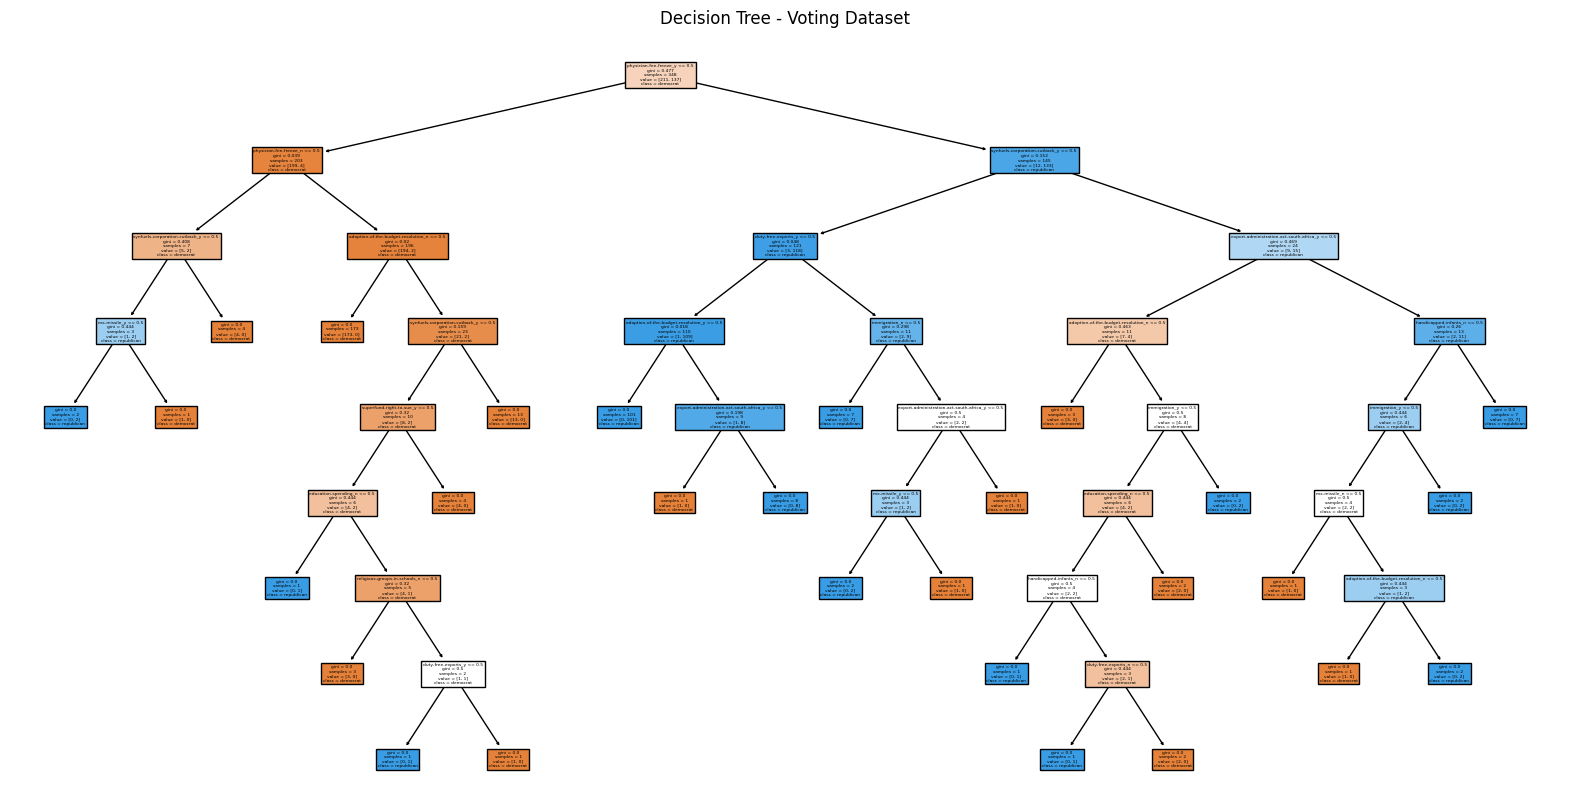

In [35]:
#Print induced trees for the voting and car data sets
from sklearn import tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# For the Cars dataset:
c_clf_full = DecisionTreeClassifier()
c_clf_full.fit(c_X, c_y)
plt.figure(figsize=(20, 10))
plot_tree(c_clf_full, filled=True, feature_names=c_X.columns, class_names=c_clf_full.classes_)
plt.title("Decision Tree - Cars Dataset")
plt.show()

# For the Voting dataset:
v_clf_full = DecisionTreeClassifier()
v_clf_full.fit(v_X_train, v_y_train)
plt.figure(figsize=(20, 10))
plot_tree(v_clf_full, filled=True, feature_names=v_X.columns, class_names=v_clf_full.classes_)
plt.title("Decision Tree - Voting Dataset")
plt.show()


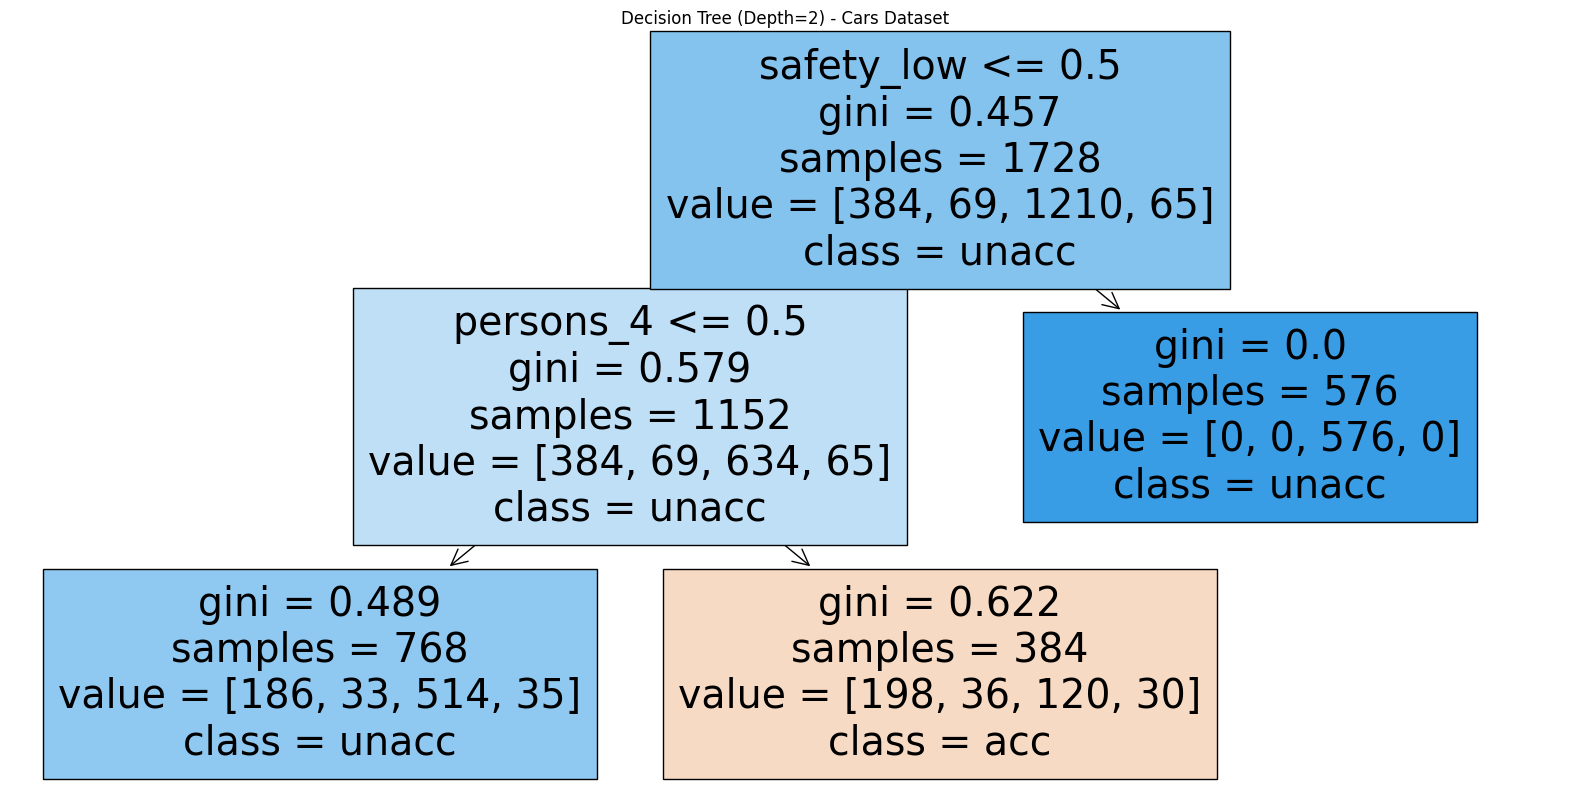

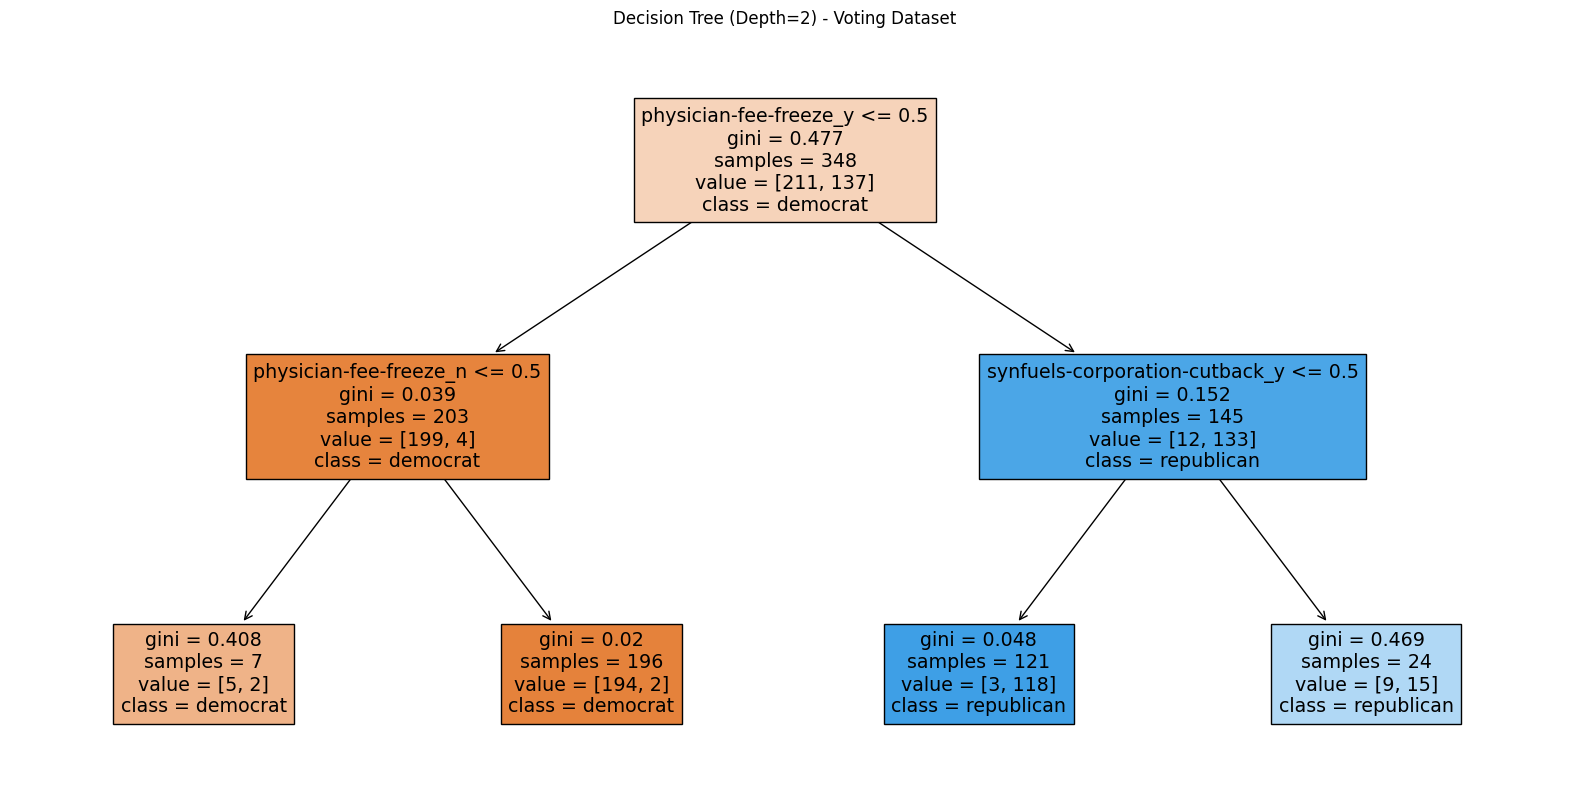

In [37]:
# For the Cars dataset:
c_clf_small = DecisionTreeClassifier(max_depth=2)
c_clf_small.fit(c_X, c_y)
plt.figure(figsize=(20, 10))
plot_tree(c_clf_small, filled=True, feature_names=c_X.columns, class_names=c_clf_small.classes_)
plt.title("Decision Tree (Depth=2) - Cars Dataset")
plt.show()

# For the Voting dataset:
v_clf_small = DecisionTreeClassifier(max_depth=2)
v_clf_small.fit(v_X_train, v_y_train)
plt.figure(figsize=(20, 10))
plot_tree(v_clf_small, filled=True, feature_names=v_X.columns, class_names=v_clf_small.classes_)
plt.title("Decision Tree (Depth=2) - Voting Dataset")
plt.show()


In [38]:
# For the Cars dataset:
cars_importances = pd.DataFrame({
    'Feature': c_X.columns,
    'Importance': c_clf_small.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importances - Cars Dataset:")
print(cars_importances)

# For the Voting dataset:
voting_importances = pd.DataFrame({
    'Feature': v_X.columns,
    'Importance': v_clf_small.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances - Voting Dataset:")
print(voting_importances)


Feature Importances - Cars Dataset:
           Feature  Importance
13      safety_low    0.700069
9        persons_4    0.299931
0       buying_low    0.000000
1       buying_med    0.000000
2     buying_vhigh    0.000000
3        maint_low    0.000000
4        maint_med    0.000000
5      maint_vhigh    0.000000
6          doors_3    0.000000
7          doors_4    0.000000
8      doors_5more    0.000000
10    persons_more    0.000000
11    lug_boot_med    0.000000
12  lug_boot_small    0.000000
14      safety_med    0.000000

Feature Importances - Voting Dataset:
                                     Feature  Importance
7                     physician-fee-freeze_y    0.958242
21            synfuels-corporation-cutback_y    0.034543
6                     physician-fee-freeze_n    0.007215
0                      handicapped-infants_n    0.000000
24                  superfund-right-to-sue_n    0.000000
19                             immigration_y    0.000000
20            synfuels-corpora

Discuss what the Trees have learned on the 2 data sets

---

Well frankly, I have to say that the plot_tree function with these classifiers are not the most telling at least in this interface because the resolution is so low. As to interpret better, I chose to set the max depth as 5 in some of the runs and it is cool to see what it learns. One insight that I hadn't really thought about but still was interestign to me was that you could have a split and have the majority class of both of the nodes still be the same. I would have previously thought that is not really possible but it makes sense because you split on features and not on the class themselves. I think this is a cool model to see what happens. It is interesting in the first model (the car dataset) that it was able to achieve purity within the first split according to the gini score splitting on the person_4 attribute describing how many people can fit. The voting dataset was able to get purity on several nodes with 3 splits but kept going beyond.


When splitting and a max depth of two, it was much easier to see. The car split on the safety of the car and the size of the car. The voting dataset was split on a physician bill and then again on another of the same bill. It is interesting to see on the voting dataset that the split on the second level used different attributes which I did not know was a possibility. I would have thought that each node is split on the same. they still have low purity in many cases.

As I look at the feature importances, It is the same as I look here. Clearly. the highest importances were split and the rest of them are less important. I am less sure if that is a compounded effect meaning that after each of those splits there is that info or if it is independent of the rest.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

Average Accuracy using gini: 0.84
Average Accuracy using entropy: 0.83
Average Accuracy using log_loss: 0.83


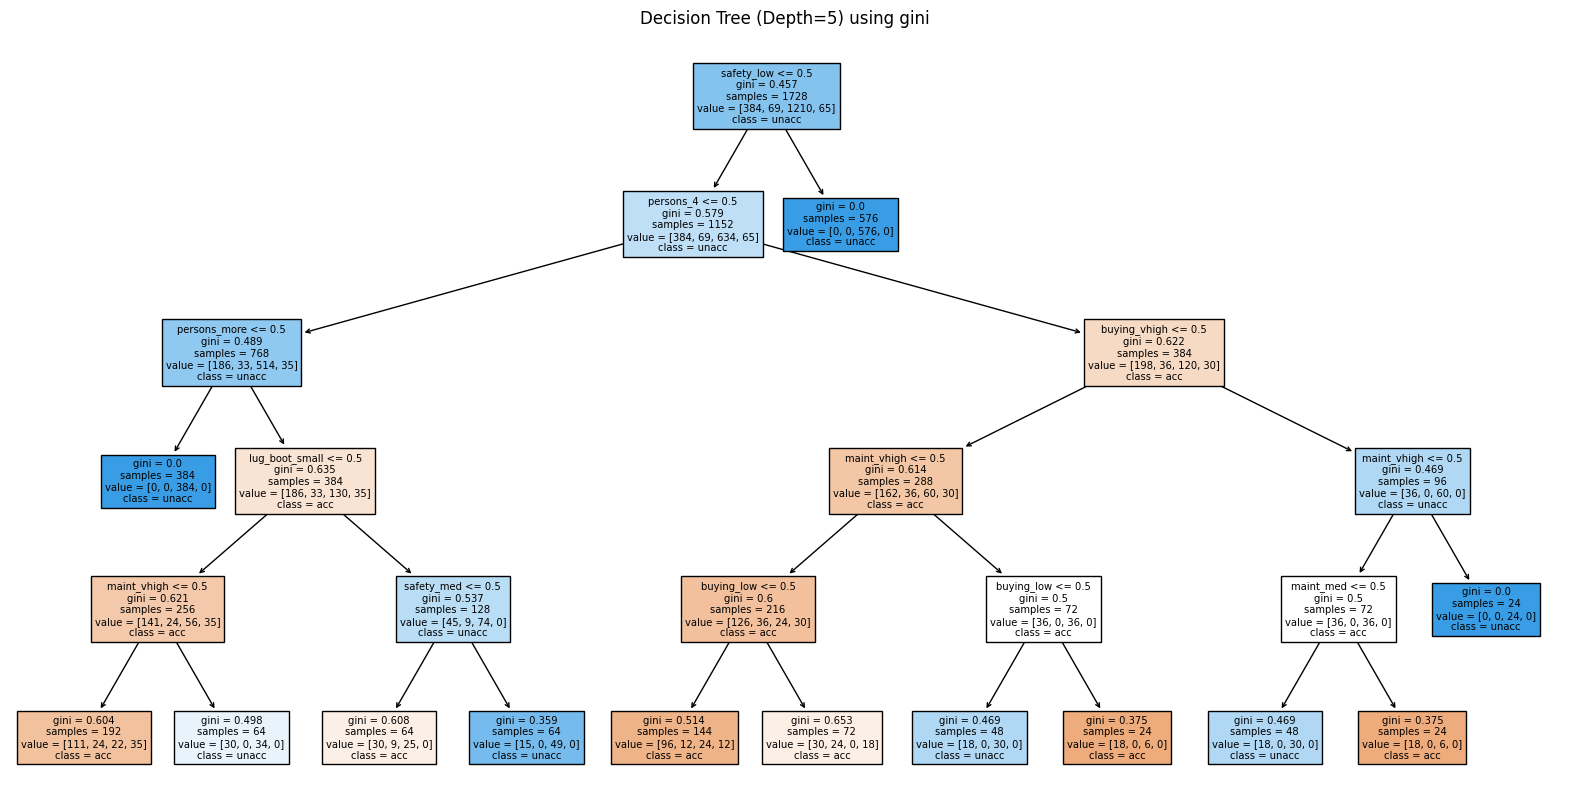

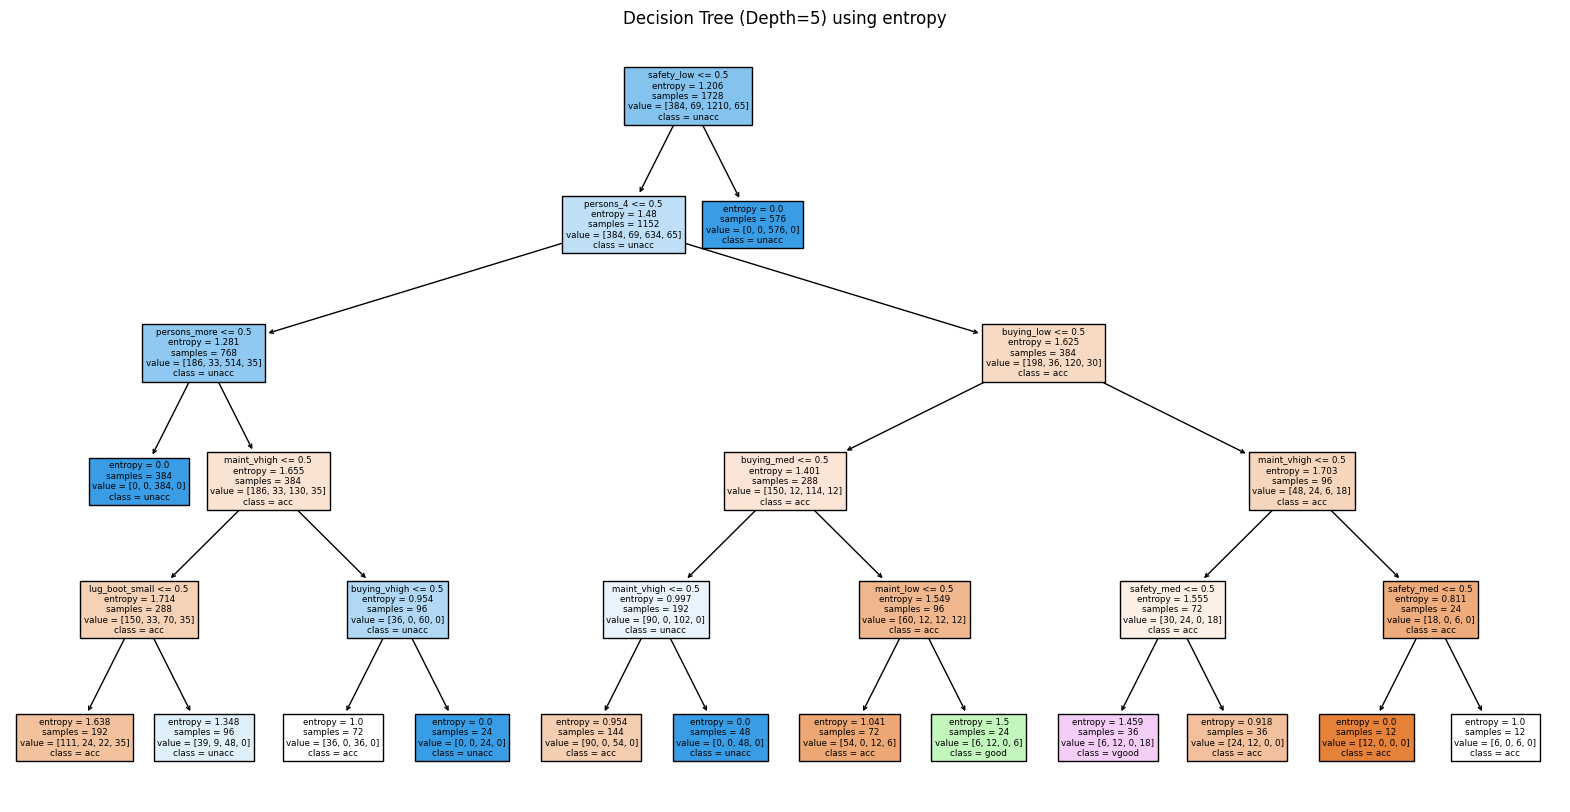

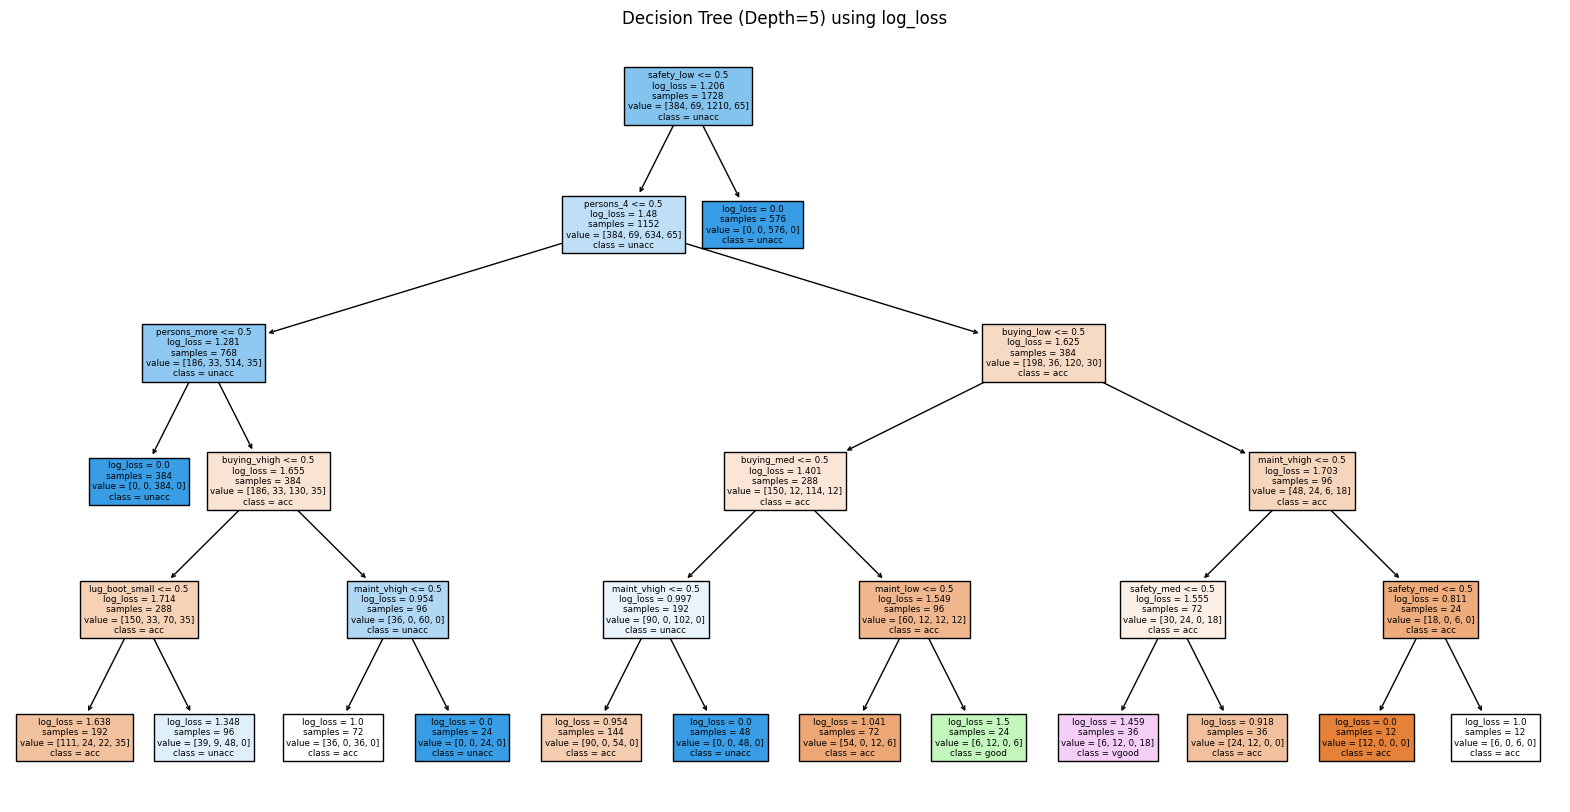

In [40]:
# Experiment with criterion parameter
# Define the different split criteria
criteria = ['gini', 'entropy', 'log_loss']

# Store accuracies for each criterion
accuracies = {}

# For each criterion, train a Decision Tree and evaluate it using 10-fold cross-validation
for criterion in criteria:
    clf = DecisionTreeClassifier(criterion=criterion)
    accuracies[criterion] = cross_val_score(clf, c_X, c_y, cv=10)

# Calculate average accuracies for each criterion
avg_accuracies = {criterion: np.mean(accuracy) for criterion, accuracy in accuracies.items()}

# Display the results
for criterion, accuracy in avg_accuracies.items():
    print(f"Average Accuracy using {criterion}: {accuracy:.2f}")

# For each criterion, train a Decision Tree with max_depth=5 and visualize it
for criterion in criteria:
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=5)
    clf.fit(c_X, c_y)

    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=c_X.columns, class_names=clf.classes_)
    plt.title(f"Decision Tree (Depth=5) using {criterion}")
    plt.show()


The function to measure the quality of a split. That is the definition of the splitting criteria. It is interesting that there is basically no difference in the quality of the split with these 3 methods. The highest accuracy was used with gini at 84% and the other 2 were 83%. I was going to think that the splitting features would have changed depending on the criteria (and maybe it does) but in this case they all split along the same level.



## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [47]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(c_X, c_y, test_size=0.2, random_state=42)


parameters = {
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'max_depth': [None, 5, 10, 15],
    'max_leaf_nodes': [None, 5, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize a list to store the results
results = []

# Experiment with the parameters and store the results in the list
for param, values in parameters.items():
    for value in values:
        clf = DecisionTreeClassifier(**{param: value})
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        results.append({
            'Parameter': param,
            'Value': str(value),  # Convert to string for consistent formatting in the table
            'Training Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Number of Nodes': clf.tree_.node_count,
            'Maximum Depth': clf.tree_.max_depth
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# Display the results table
df_results


,Parameter,Value,Training Accuracy,Test Accuracy,Number of Nodes,Maximum Depth
0,min_samples_leaf,1,1.000000,0.890173,299,14
1,min_samples_leaf,2,0.980463,0.910405,215,13
2,min_samples_leaf,5,0.945731,0.895954,121,11
3,min_samples_leaf,10,0.906657,0.861272,87,10
4,min_samples_split,2,1.000000,0.884393,301,14
5,min_samples_split,5,0.978292,0.904624,209,13
6,min_samples_split,10,0.961650,0.907514,145,11
7,min_impurity_decrease,0.0,1.000000,0.890173,301,14
8,min_impurity_decrease,0.1,0.705499,0.679191,1,0
9,min_impurity_decrease,0.2,0.705499,0.679191,1,0


So I didnt do a comprehensive search of all of these (I attempted and there were 1728 rows which made it a bit of a less informative list). But as I look down this table, it is true there is no one that is much higher than the rest. The data is all within about 10% accuracy and does not change way to much. I think that there is an interesting pattern becuase it is pretty much impossible to not get 100% accuracy on the training set with no max depth but as we go up and we limit it, the training accuracy and the testing accuracy converge which is likely a more accuracte representation of what the true model is. This is a similar pattern with the max leaf nodes and the max features as well. The min impurity and min leaf samples is good show for limiting the splitting which is great but can lead to underfit

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [48]:
# Pruning
# Define a list of ccp_alpha values to experiment with
ccp_alphas = [0.0001, 0.001, 0.005, 0.01, 0.05]

# Initialize a list to store the results
results = []

# For each ccp_alpha value, train a Decision Tree and record the metrics
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results.append({
        'ccp_alpha': ccp_alpha,
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Number of Nodes': clf.tree_.node_count,
        'Maximum Depth': clf.tree_.max_depth
    })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# Display the results table
df_results


,ccp_alpha,Training Accuracy,Test Accuracy,Number of Nodes,Maximum Depth
0,0.0001,1.000000,0.881503,301,14
1,0.0010,0.976122,0.921965,145,11
2,0.0050,0.868307,0.878613,37,8
3,0.0100,0.772793,0.797688,7,3
4,0.0500,0.772793,0.797688,7,3


So clearly as we increase the pruning level the more we reduce splits. This shows as we look at the .05 value we see the levels of nodes and depth greatly limited. This does take a huge hit on accuracy but it definitely is not overfitting. It looks like the optimal level of splitting falls between .001 and .005 but I am sure it is dependent on the situation. This is a really great show of what pruning can do. Very powerful.

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [63]:
diamonds_df = pd.read_csv('diamonds.csv')
diamonds_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

# One-hot encode the categorical columns
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(diamonds_df[['cut', 'color', 'clarity']])
encoded_columns = encoder.get_feature_names_out(['cut', 'color', 'clarity'])
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)

# Drop the original categorical columns and replace them with the encoded ones
diamonds_df = diamonds_df.drop(columns=['cut', 'color', 'clarity'])
diamonds_df = pd.concat([diamonds_df, df_encoded], axis=1)

# Split the data into training and test sets
X = diamonds_df.drop('price', axis=1)
y = diamonds_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Predict on the training and test set
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) for both training and test set
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Report tree statistics
num_nodes = regressor.tree_.node_count
num_leaves = sum(regressor.tree_.children_left == regressor.tree_.children_right)
max_depth = regressor.tree_.max_depth

# Report the coefficient of determination (R^2 score) for both training and test set
r2_train = regressor.score(X_train, y_train)
r2_test = regressor.score(X_test, y_test)

print(f"Tree Statistics:")
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Leaf Nodes: {num_leaves}")
print(f"Maximum Depth: {max_depth}\n")

print(f"Mean Absolute Error (Training Set): {mae_train:.2f}")
print(f"Mean Absolute Error (Test Set): {mae_test:.2f}\n")

print(f'DT Coefficient of Determination or R2')
print(f"R^2 Score (Training Set): {r2_train:.2f}")
print(f"R^2 Score (Test Set): {r2_test:.2f}")

Tree Statistics:
Number of Nodes: 73737
Number of Leaf Nodes: 36869
Maximum Depth: 41

Mean Absolute Error (Training Set): 0.49
Mean Absolute Error (Test Set): 387.98

DT Coefficient of Determination or R2
R^2 Score (Training Set): 1.00
R^2 Score (Test Set): 0.95


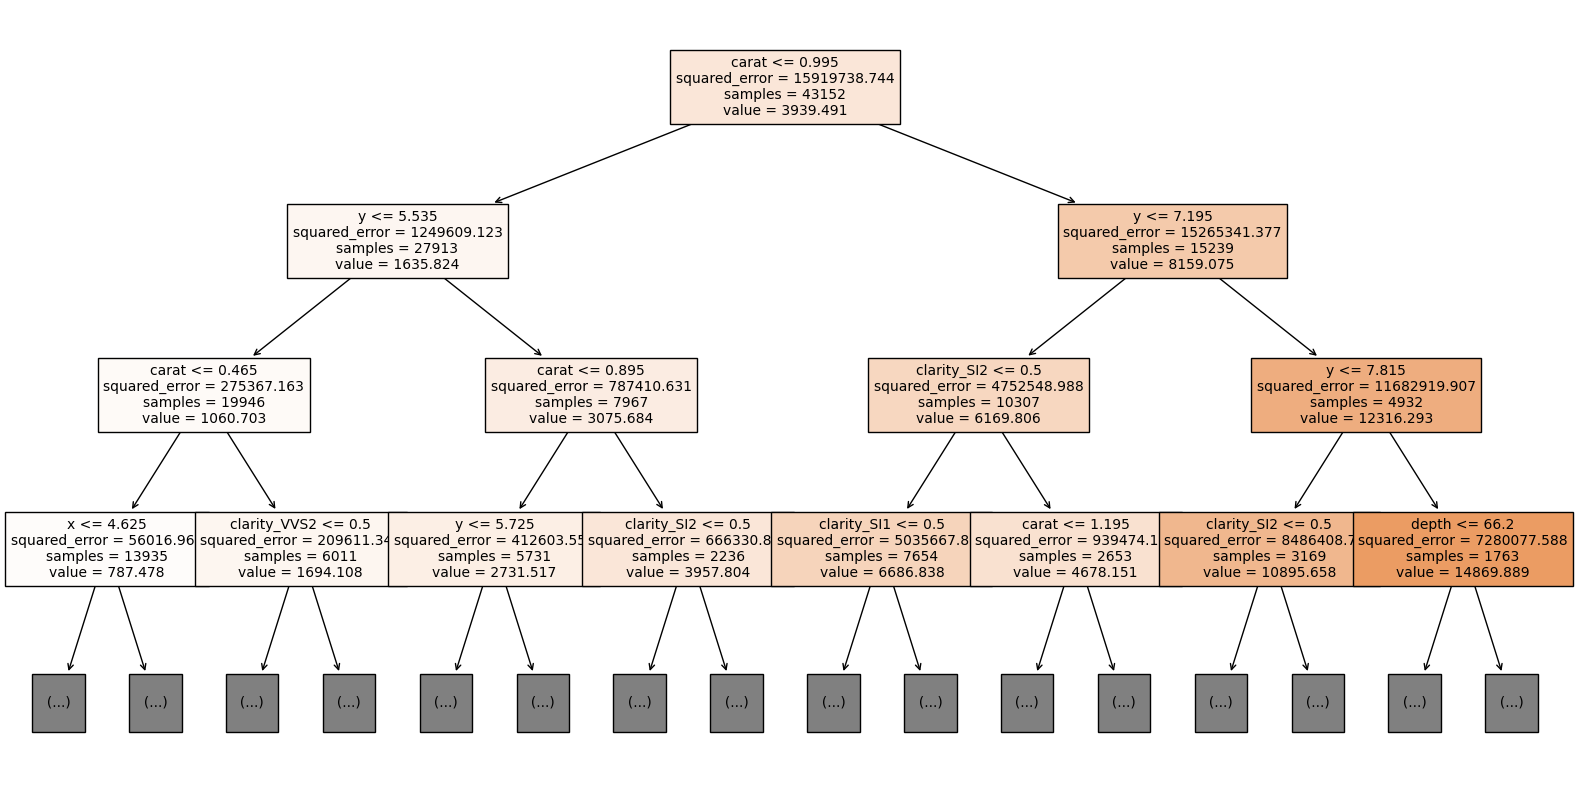

In [64]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=X.columns, fontsize=10, max_depth=3)
plt.show()


This was a HUGE DT. It is interesting to see that this has over 70000 nodes and 30k leaf nodes. I imagine that this makes sense given that with continous data and and a regression output, you would have to make a lot a lot a lot of splits. As you would expect, diamond values and prices are determined by the feature attributes and so the R2 score is very high with a 95%. This means that 95 percent of the variance in these values is correlated with the price.

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly.
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

My code below is my implementation of the DT Classifier. I had to do a bit of int manipulation to get it to work but it is cool to see that it worked as did the above CART method. I was able to get very good accuracy and it was nearly the same that it was as with the actual classifier. This would make sense that the algorithm is virtually the same and so it works the same. So far, this is my favorite algorithm because it is really simple but it is also very effective. I think this makes the Decision tree really powerful and has wider applications like random forest.

In [66]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

def entropy(y):
    """Compute entropy of a label sequence."""
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class DTClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self,counts=None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(count = [2,3,2,2])
            Dataset =
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]

        """
        self.counts = counts
        self.tree = {}

    def fit(self, X, y):
        """ Fit the data; Make the Decision tree

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.tree = self._build_tree(X, y)
        return self

    def _build_tree(self, X, y):
        # If only one class remains
        if len(np.unique(y)) == 1:
            return y[0]

        # If no features remain
        if X.shape[1] == 0:
            return np.bincount(y).argmax()

        feature = self._best_feature(X, y)
        tree = {feature: {}}

        # Using counts to get all possible feature values
        unique_values = range(self.counts[feature]) if self.counts else np.unique(X[:, feature])

        for value in unique_values:
            child_X = X[X[:, feature] == value]
            child_y = y[X[:, feature] == value]
            if child_X.shape[0] == 0:
                tree[feature][value] = np.bincount(y).argmax()
            else:
                tree[feature][value] = self._build_tree(child_X, child_y)
        return tree

    def _best_feature(self, X, y):
        base_entropy = entropy(y)
        best_info_gain = -1
        best_feature = -1
        for feature in range(X.shape[1]):
            new_entropy = sum([(sum(X[:, feature] == value) / X.shape[0]) * entropy(y[X[:, feature] == value]) for value in np.unique(X[:, feature])])
            info_gain = base_entropy - new_entropy
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_feature = feature
        return best_feature


    def predict(self, X):
        """ Predict all classes for a dataset X

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets

        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        if not isinstance(tree, dict):
            return tree
        feature = list(tree.keys())[0]
        if sample[feature] in tree[feature]:
            return self._predict_sample(sample, tree[feature][sample[feature]])
        else:
            return np.random.choice(list(tree[feature].values()))



    def score(self, X, y):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets
        """
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [15]:
# Optional Debugging Dataset - Pizza Homework
# pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
# pizza_labels = np.array([2,0,1,2,1,2,1,1,0])

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert labels to integer values for compatibility with the custom classifier
unique_labels = v_df['Class'].unique()
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
int_to_label = {idx: label for label, idx in label_to_int.items()}
v_y_int = v_df['Class'].map(label_to_int)

# Split the data into train and test sets (80/20)
v_X_train, v_X_test, v_y_train_int, v_y_test_int = train_test_split(v_X, v_y_int, test_size=0.2, random_state=42)

# Train the custom DTClassifier
v_custom_clf = DTClassifier()
v_custom_clf.fit(v_X_train.values, v_y_train_int.values)

# Predict and compute accuracies
v_y_train_pred_int = v_custom_clf.predict(v_X_train.values)
v_y_test_pred_int = v_custom_clf.predict(v_X_test.values)

train_accuracy_custom = accuracy_score(v_y_train_int, v_y_train_pred_int)
test_accuracy_custom = accuracy_score(v_y_test_int, v_y_test_pred_int)

print(f"[Custom Classifier] Training Accuracy: {train_accuracy_custom:.2f}")
print(f"[Custom Classifier] Test Accuracy: {test_accuracy_custom:.2f}")


[Custom Classifier] Training Accuracy: 1.00
[Custom Classifier] Test Accuracy: 0.95


My Discussion is above ^^